In [17]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme (context='notebook', style='whitegrid', palette='muted')

In [18]:
df = pd.read_csv('Titanic.csv', index_col='PassengerId')

In [19]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [20]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [22]:
df.describe

<bound method NDFrame.describe of              Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William

In [23]:
df = df.drop(columns='Cabin').dropna(subset=['Embarked'])

In [24]:
df['Age'] = df['Age'].round()

df['Pclass'] = df['Pclass'].map({1:'Upper', 2:'Middle', 3:'Lower'})

df['Embarked'] = df['Embarked'].map({1:'Upper', 2:'Middle', 3:'Lower'})

df['Survived'] = df['Survived'].map({0:'Survived', 1:'Not Survived'})

df['Sex'] = df['Sex'].str.title()

categorical_columns = ['Sex', 'Parch', 'SibSp', 'Pclass', 'Embarked', 'Survived']
df[categorical_columns] = df[categorical_columns].astype('category')

In [25]:
cols = [
    'Name', 'Sex', 'Age', 'Parch', 'SibSp',
    'Ticket', 'Pclass', 'Embarked', 'Fare',
    'Survived'
]

df = df[cols]

In [26]:
df.head()

,Name,Sex,Age,Parch,SibSp,Ticket,Pclass,Embarked,Fare,Survived
PassengerId,,,,,,,,,,
1,"Braund, Mr. Owen Harris",Male,22.0,0,1,A/5 21171,Lower,NaN,7.2500,Survived
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,0,1,PC 17599,Upper,NaN,71.2833,Not Survived
3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,Lower,NaN,7.9250,Not Survived
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,0,1,113803,Upper,NaN,53.1000,Not Survived
5,"Allen, Mr. William Henry",Male,35.0,0,0,373450,Lower,NaN,8.0500,Survived


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      889 non-null    object  
 1   Sex       889 non-null    category
 2   Age       712 non-null    float64 
 3   Parch     889 non-null    category
 4   SibSp     889 non-null    category
 5   Ticket    889 non-null    object  
 6   Pclass    889 non-null    category
 7   Embarked  0 non-null      category
 8   Fare      889 non-null    float64 
 9   Survived  889 non-null    category
dtypes: category(6), float64(2), object(2)
memory usage: 41.1+ KB


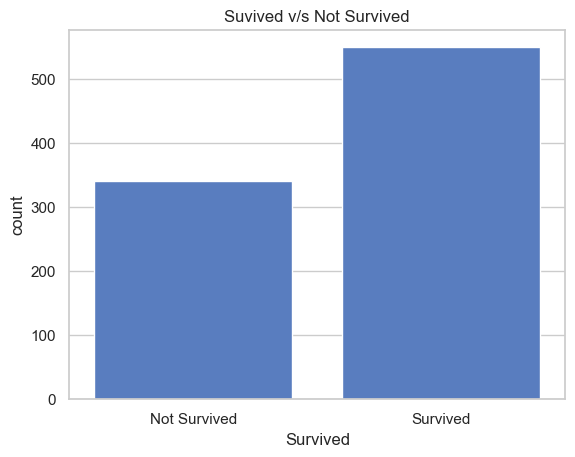

In [28]:
sns.countplot(data=df, x='Survived')
plt.title('Suvived v/s Not Survived')
plt.show();